<a href="https://colab.research.google.com/github/LiscaAngriani/APM_Kelompok3/blob/main/SVM_Polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Importing the dataset
import io
df = pd.read_csv('survey lung cancer.csv', encoding= 'latin-1')
df.head(n=10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [ ]:
dict_cancer = {
    'YES' : 2,
    'NO' : 1
}
df['Lung_Cancer'] = df['LUNG_CANCER'].apply(lambda x : dict_cancer[x])

feature_cols = ['AGE', 'SMOKING', 'ANXIETY', 'ALCOHOL CONSUMING','COUGHING']
X = df[feature_cols]
y = df['Lung_Cancer']

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Lung_Cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,1
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape

((247, 5), (62, 5))

In [ ]:
cols = X.columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,AGE,SMOKING,ANXIETY,ALCOHOL CONSUMING,COUGHING
count,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02
mean,-1.469809e-16,-3.416071e-17,1.294511e-16,2.292363e-16,-1.456325e-16
std,1.002030e+00,1.002030e+00,1.002030e+00,1.002030e+00,1.002030e+00
min,-3.114494e+00,-1.134477e+00,-9.564145e-01,-1.125191e+00,-1.202308e+00
25%,-6.115494e-01,-1.134477e+00,-9.564145e-01,-1.125191e+00,-1.202308e+00
50%,-1.109605e-01,8.814638e-01,-9.564145e-01,8.887379e-01,8.317336e-01
75%,7.650701e-01,8.814638e-01,1.045572e+00,8.887379e-01,8.317336e-01
max,3.017720e+00,8.814638e-01,1.045572e+00,8.887379e-01,8.317336e-01


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
poly_svc=SVC(kernel='poly', C=10.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.8548


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 1  9]
 [ 0 52]]

True Positives(TP) =  1

True Negatives(TN) =  52

False Positives(FP) =  9

False Negatives(FN) =  0


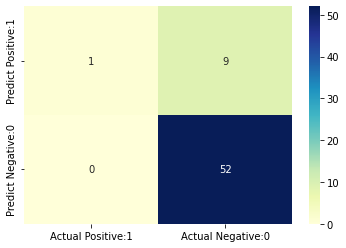

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.10      0.18        10
           2       0.85      1.00      0.92        52

    accuracy                           0.85        62
   macro avg       0.93      0.55      0.55        62
weighted avg       0.88      0.85      0.80        62



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8548


In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1452


In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.1000
